In [1]:
#Step 1:
# Import libraries
# In this section, you can use a search engine to look for the functions that will help you implement the following steps

import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import pickle

The size of the given dataframe is:  (2284, 59)


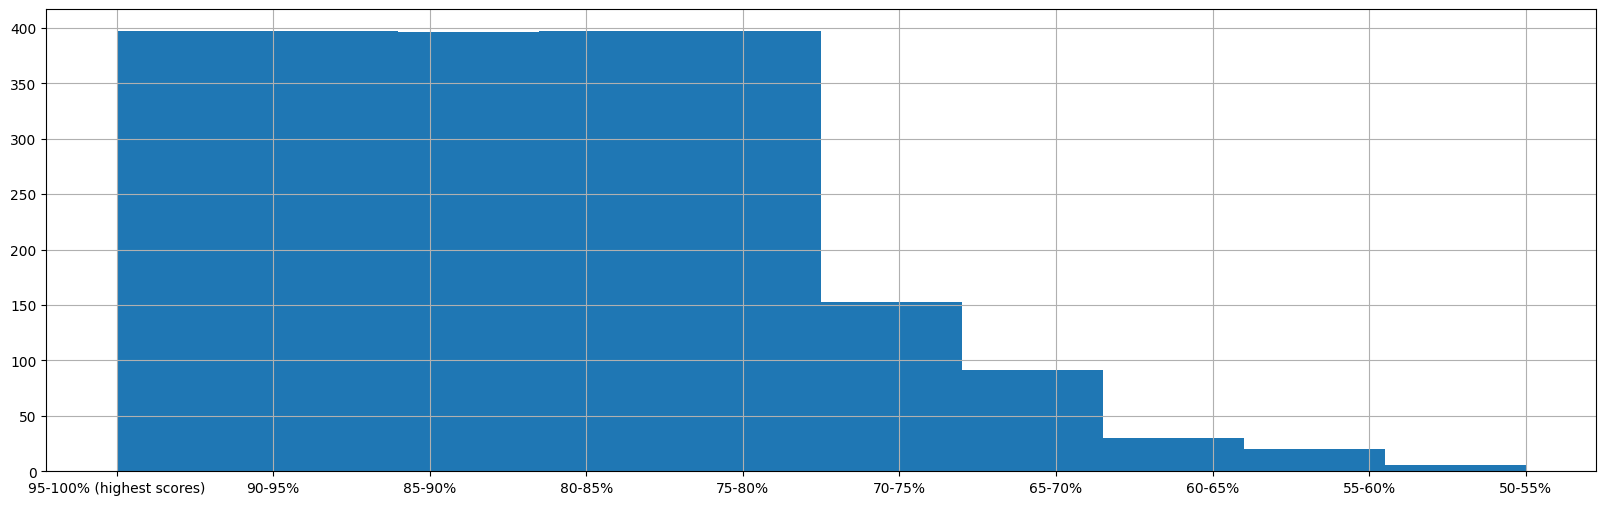

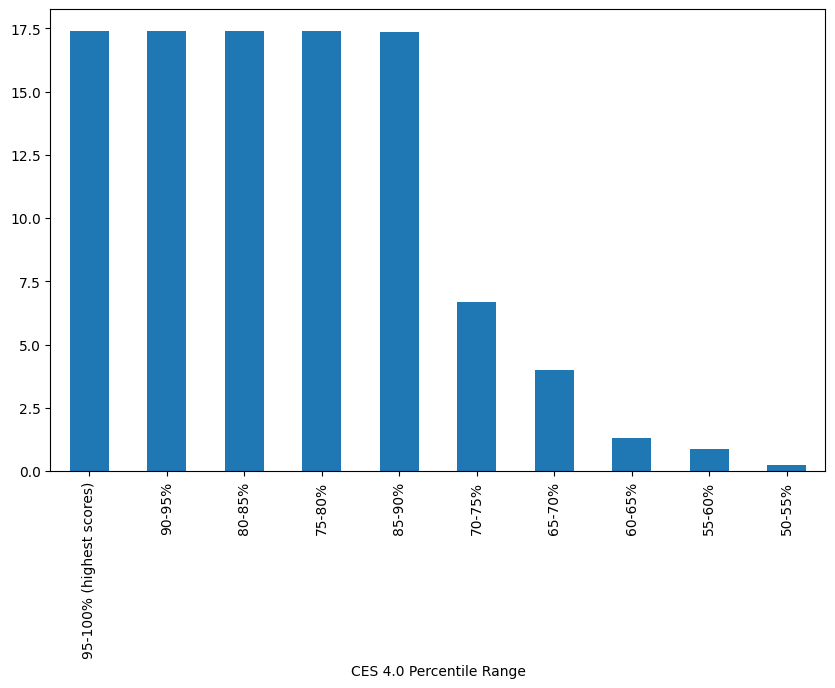

In [2]:
#Step 2:
# Load dataset and show basic statistics
df = pd.read_csv('disadvantaged_communities.csv')
# 1. Show dataset size (dimensions)
print("The size of the given dataframe is: ", df.shape)

# 2. Show what column names exist for the 49 attributes in the dataset
df.columns


# 3. Show the distribution of the target class CES 4.0 Percentile Range column
# Create a new figure for the histogram
plt.figure(figsize=(20, 6))
#apply hist plot over target class column
df['CES 4.0 Percentile Range'].hist()

plt.show()



# 4. Show the percentage distribution of the target class CES 4.0 Percentile Range column
# Calculate percentage distribution
percentage_distribution = df['CES 4.0 Percentile Range'].value_counts(normalize=True) * 100
# Create a new figure for the bar plot
plt.figure(figsize=(10, 6))
# Plot the percentage distribution
percentage_distribution.plot(kind='bar')
# Show the plot
plt.show()



In [3]:
# Step 3:
#Clean the dataset - you can eitherhandle the missing values in the dataset
# with the mean of the columns attributes or remove rows the have missing values.

# Drop rows with NaN values
df.dropna(inplace=True)

print("Here is the shape of the df after removing rows with NaN", df.shape)

Here is the shape of the df after removing rows with NaN (2193, 59)


In [4]:
# Step 4: 
#Encode the Categorical Variables - Using OrdinalEncoder from the category_encoders library to encode categorical variables as ordinal integers
from category_encoders import OrdinalEncoder

# Create an instance of OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the categorical variables in the DataFrame
df_encoded = encoder.fit_transform(df)

In [5]:
df_encoded

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,2780,1,93706,1,-119.781696,36.709695,93.18,100.00,1,...,79.37,76.0,98.92,12.8,93.83,30.3,91.04,93.16,9.66,99.72
1,6077000700,4680,2,95206,2,-121.287873,37.943173,86.65,99.99,1,...,95.53,73.2,98.39,19.8,99.21,31.2,92.28,93.17,9.66,99.74
2,6037204920,2751,3,90023,3,-118.197497,34.017500,82.39,99.97,1,...,81.55,62.6,93.39,6.4,61.53,20.3,63.97,83.75,8.69,95.79
3,6019000700,3664,1,93706,1,-119.827707,36.734535,81.33,99.96,1,...,78.71,65.7,95.35,15.7,97.35,35.4,96.41,94.64,9.82,99.89
4,6019000200,2689,1,93706,1,-119.805504,36.735491,80.75,99.95,1,...,86.56,72.7,98.30,13.7,95.29,32.7,94.16,95.40,9.90,99.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,6071001311,3350,5,91730,239,-117.598912,34.085594,28.40,55.71,9,...,61.90,25.7,45.74,2.7,13.18,20.0,62.83,43.99,4.56,41.14
2278,6075017801,3891,22,94107,115,-122.401159,37.782028,27.87,54.70,10,...,98.52,48.0,79.66,2.5,10.66,7.7,6.10,48.77,5.06,48.46
2279,6071001808,4644,5,91761,11,-117.618736,34.025502,27.24,53.52,10,...,17.26,20.2,34.70,3.5,23.75,12.5,25.73,40.85,4.24,36.49
2280,6099002006,4681,4,95357,28,-120.925472,37.644922,27.02,53.05,10,...,37.66,31.4,56.07,8.8,80.39,6.7,3.76,57.08,5.92,61.03


In [6]:
# Step 5: 
# Separate predictor variables from the target variable (attributes (X) and target variable (y) as we did in the class)
# Select columns before the target column
X_before = df_encoded.iloc[:, :9]  # All rows, columns from 0 to 9 (exclusive)
# Select columns after the target column
X_after = df_encoded.iloc[:, 10:]  # All rows, columns from 10 to the end
# Concatenate the two DataFrames along the column axis
#THIS IS THE WHOLE ATTRIBUTES FOR THE TARGET VARIABLE
X = pd.concat([X_before, X_after], axis=1)
# Select the target column
y = df_encoded.iloc[:, 9]  # All rows, column 9




# Create train and test splits for model development. Use the 80% and 20% split ratio
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
# Use stratifying (stratify=y) to ensure class balance in train/test splits
# Name them as X_train, X_test, y_train, and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [7]:
X_train

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,DAC category,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
391,6101050202,3608,20,95991,77,-121.612886,39.135348,58.94,95.07,1,...,79.37,63.7,94.13,17.4,98.36,27.7,86.29,72.26,7.50,83.12
1363,6037134800,6399,3,91306,3,-118.571550,34.195576,45.67,82.82,1,...,51.51,28.1,50.68,6.8,65.63,24.8,79.57,68.44,7.10,78.01
234,6037533603,6986,3,90201,20,-118.195066,33.972473,62.93,97.05,1,...,88.70,59.9,91.56,9.1,82.33,20.4,64.46,80.43,8.34,92.94
1285,6037199120,4511,3,90031,3,-118.199690,34.070070,46.45,83.80,1,...,89.29,62.6,93.39,13.3,94.83,32.3,93.59,62.39,6.47,69.31
581,6019001700,6945,1,93725,5,-119.729139,36.616473,55.24,92.68,1,...,63.04,38.2,66.43,7.5,71.67,9.8,13.09,67.38,6.99,76.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,6077005305,7083,2,95376,233,-121.438280,37.758114,34.37,66.50,2,...,61.09,31.8,56.67,6.2,59.38,17.5,51.77,57.33,5.95,61.45
1872,6037224310,2422,3,90006,3,-118.282721,34.044384,40.87,76.40,1,...,99.12,70.1,97.34,4.4,36.44,29.2,89.21,60.75,6.30,66.58
244,6037553701,3981,3,90723,50,-118.178091,33.904948,62.66,96.92,1,...,75.53,60.5,92.02,4.8,41.84,24.3,78.11,70.86,7.35,81.16
138,6037239701,5134,3,90003,3,-118.275263,33.966092,66.53,98.26,1,...,87.21,63.6,94.07,8.6,78.97,33.7,95.12,94.01,9.75,99.81


In [8]:
y_train

391     1
1363    4
234     1
1285    4
581     2
       ..
2208    7
1872    5
244     1
138     1
286     1
Name: CES 4.0 Percentile Range, Length: 1754, dtype: int32

In [9]:
# Do not do steps 6 - 8 for the Ramdom Forest Model
# Step 6:
# Standardize the features (Import StandardScaler here)
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training set and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set
X_test_scaled = scaler.transform(X_test)



# Step 7:
# Below is the code to convert X_train and X_test into data frames for the next steps
cols = X_train.columns
# Convert X_train_scaled and X_test_scaled into data frames for the next steps
X_train = pd.DataFrame(X_train, columns=[cols]) # pd is the imported pandas library
X_test = pd.DataFrame(X_test, columns=[cols]) # pd is the imported pandas library


In [10]:
# Step 8 - Build and train the SVM classifier
# Train SVM with the following parameters. (use the parameters with the highest accuracy for the model)
   #    1. RBF kernel
   #    2. C=10.0 (Higher value of C means fewer outliers)
   #    3. gamma = 0.3 (Linear)

from sklearn.svm import SVC

# Create an instance of SVC with the specified parameters
svc = SVC(kernel='linear', C=10.0, gamma=0.3)

# Fit the model to the training data
svc.fit(X_train_scaled, y_train)




SVC(C=10.0, gamma=0.3, kernel='linear')

In [11]:
# Save your SVC model (whatever name you have given your model) as .sav to upload with your submission
# You can use the library pickle to save and load your model for this assignmen

# Save the model to disk
with open('SvmClassifier.sav', 'wb') as file:
    pickle.dump(svc, file)

In [12]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = svc.predict(X_test_scaled)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(y_pred)

# Print the accuracy score
print("Accuracy score: ", accuracy)


[5 3 1 1 4 2 2 5 3 2 1 1 2 4 1 3 3 2 7 8 4 3 1 3 4 3 2 4 3 2 3 5 5 5 2 1 4
 5 2 3 5 3 4 3 2 4 5 1 3 6 3 2 5 2 1 2 1 2 4 1 1 6 1 1 5 4 3 4 5 4 8 3 4 2
 2 4 5 5 5 1 4 2 5 1 1 2 1 7 4 4 2 2 1 1 6 4 5 2 6 2 3 1 4 1 2 4 2 3 3 4 5
 4 3 1 5 3 5 1 2 1 1 4 8 1 2 2 1 2 4 2 6 1 6 4 2 4 4 2 7 4 1 1 5 1 5 3 1 4
 5 1 3 3 5 2 3 3 4 1 5 7 2 5 1 5 5 4 3 5 5 2 6 4 5 2 6 1 7 8 2 6 1 5 3 5 2
 5 5 1 5 2 7 5 2 5 3 5 3 6 2 2 5 4 4 5 1 5 3 7 3 4 2 5 1 2 3 3 4 4 7 7 1 2
 2 1 1 5 4 3 5 3 5 5 3 1 4 1 5 4 1 1 4 2 3 4 2 6 3 2 4 3 2 5 3 2 3 6 4 2 4
 1 1 1 7 6 5 4 4 5 4 2 3 3 2 1 3 4 7 1 5 4 3 2 3 2 1 4 3 1 4 1 1 4 5 7 6 9
 3 5 5 7 4 3 2 1 3 4 2 5 1 1 1 6 7 2 4 6 6 3 1 2 5 5 6 3 2 1 2 6 3 2 1 5 2
 4 2 3 3 4 9 4 6 2 5 4 6 3 3 8 3 4 1 4 4 5 3 8 2 1 1 3 4 6 7 4 2 4 2 3 2 4
 5 3 5 2 4 6 1 7 6 2 5 1 1 3 4 4 6 1 5 3 5 4 2 2 5 5 3 5 3 3 2 1 2 4 2 4 3
 5 2 2 5 8 7 3 3 5 3 5 6 4 5 5 4 1 1 3 3 1 9 4 4 6 7 1 4 8 1 5 2]
Accuracy score:  0.9157175398633257


In [13]:
# Step 9: Build and train the Random Forest classifier
# Train Random Forest  with the following parameters.
# (n_estimators=10, random_state=0)

# Create train and test splits for model development. Use the 80% and 20% split ratio
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
# Use stratifying (stratify=y) to ensure class balance in train/test splits
# Name them as X_train, X_test, y_train, and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)      #x and y are the encoded dataframes we made previously


from sklearn.ensemble import RandomForestClassifier

# Create an instance of RandomForestClassifier with the specified parameters
rf = RandomForestClassifier(n_estimators=10, random_state=0)

# Fit the model to the training data
rf.fit(X_train, y_train)



# Test the above developed Random Forest model on unseen DACs dataset samples
y_pred = rf.predict(X_test)

print(y_pred)

# compute and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
#print the accuracy score
print("Accuracy score: ", accuracy)


# Save your Random Forest model (whatever name you have given your model) as .sav to upload with your submission
# You can use the library pickle to save and load your model for this assignment

[5 3 1 1 4 3 2 5 3 2 1 1 2 4 1 3 3 2 7 8 4 3 1 3 4 3 2 3 3 1 3 4 5 5 2 1 5
 5 2 3 5 3 4 3 2 4 5 1 2 6 3 2 5 1 1 2 1 2 4 1 1 6 1 1 5 4 3 4 5 4 7 4 4 3
 2 4 5 5 5 1 4 2 5 1 1 2 1 6 4 4 2 2 1 1 6 4 5 2 6 2 2 1 4 1 2 4 2 3 3 4 5
 4 3 1 5 3 4 1 2 1 1 4 7 1 2 2 1 2 4 2 6 1 6 4 2 4 4 2 8 4 1 1 5 1 5 3 1 4
 4 1 3 3 5 2 3 3 4 1 5 7 1 5 1 5 5 4 3 5 5 2 6 4 5 2 6 1 6 7 2 6 1 5 3 5 2
 5 5 1 5 2 7 5 2 5 3 5 3 6 2 2 5 4 4 5 1 5 3 7 3 4 2 5 1 3 3 3 4 4 7 7 1 2
 2 1 1 5 4 3 5 3 5 5 3 2 4 1 5 4 1 1 4 2 3 4 2 6 3 2 4 3 2 5 3 2 3 6 4 2 3
 1 1 1 7 5 5 4 4 5 4 2 3 3 2 1 3 4 7 1 5 4 3 3 3 2 1 4 3 2 5 1 1 3 5 7 6 7
 3 5 5 7 4 3 2 1 3 4 3 5 1 1 1 6 7 2 3 6 6 3 1 2 5 5 6 3 2 1 2 6 3 2 1 5 2
 5 2 3 3 4 9 4 6 2 5 4 6 3 3 6 3 4 1 4 4 5 3 7 2 1 1 4 4 6 6 4 2 4 2 3 2 4
 5 3 5 2 4 6 1 6 6 2 5 1 1 3 4 4 6 1 5 3 5 4 2 2 5 5 3 5 3 3 2 1 2 4 2 5 3
 5 2 2 5 7 7 3 3 5 3 5 6 4 4 5 4 1 1 3 3 1 6 4 4 6 7 2 4 7 1 5 2]
Accuracy score:  0.9544419134396356


In [14]:
# Save your Random Forest model (whatever name you have given your model) as .sav to upload with your submission
# You can use the library pickle to save and load your model for this assignment

# Save the model to disk
with open('RfClassifier.sav', 'wb') as file:
    pickle.dump(rf, file)